In [1]:
using Plots, LaTeXStrings

In [12]:
Plots.scalefontsizes(1.5)

In [2]:
pyplot()

Plots.PyPlotBackend()

In [3]:
include("singledefect.jl")

rho_bouchaud_2ndtinfty (generic function with 1 method)

The SDA method is based on the computation of the average
$$
\rho(\lambda) = \lim_{\epsilon \rightarrow 0} \frac{1}{\pi} {\rm{Real}} \left \langle \frac{{\rm{e}}^{\beta E} c}{\Omega(E, \{E_j\}, \lambda_\epsilon; \bar{\omega})} \right \rangle_{E, \{E_j\}}
$$ 

with 
$$
\Omega(E, \{E_j\}, \lambda_\epsilon; \bar{\omega}) = i\lambda_\epsilon {\rm{e}}^{\beta E} c + \sum_{k = 1}^c \frac{f(E, E_k) \bar{\omega}}{if(E,E_k) + \bar{\omega}}
$$

and 
$$
\bar{\omega}:= \bar{\omega}(\lambda_\epsilon, c) = \frac{1}{4}(i(-2+2c\lambda_\epsilon) + \sqrt{-4 +4 c -c^2-4c^2\lambda_\epsilon - 4 c^2\lambda_\epsilon^2} )
$$

For a given value of $\lambda$ and $\epsilon$, the algorithm to estimate this average is:

- Fix the ensemble size $N$.

    For j in 1:N

    - Compute $\bar{\omega}$
    - Draw $c$ random energies $E_j$ from the distribution $\rho_E(E) = {\rm{e}}^{-E}$
    - Generate one random energy from $\rho_E(E)$
    - Compute $\bar{\omega}$ and $\Omega$.
    - Store the number $p_j = {\rm{Real}}\left(\frac{{\rm{e}}^{\beta E} c}{\Omega(E, \{E_j\}, \lambda_\epsilon; \bar{\omega})} \right) $
    end
    

- Calculate the estimator $\hat{\rho}(\lambda) = \frac{1}{\pi} \sum_{j=1}^N p_j$
    






So we are estimating the mean of the random variable $X_\lambda = {\rm{Real}} \left(\frac{{\rm{e}}^{\beta E} c}{\Omega(E, \{E_j\}, \lambda_\epsilon; \bar{\omega})} \right)$. It is convenient therefore to examine the distribution of $X_\lambda$ in order to understand the scaling of the ensemble size with $\lambda$ for different $T's$.

We define the function that store realizations of $X_\lambda$ for a given value of $\lambda, c, T,$ ensemble_size and $\epsilon$

In [19]:
function x_lambda(lambda, c, T, ensemble, epsilon2)
beta = 1.0/T
    res = zeros(ensemble);
    dist_energy = Exponential()
    
    obar = omegabar(lambda, c, epsilon2)
    energies = rand(dist_energy,c)
    e1 = rand(dist_energy)
    Kij = K_sym(e1, beta, energies)
    omega_cm1 =  im*(lambda-epsilon2*im)*exp(beta*e1)*c + sum(im*(Kij.*obar)./(im*(Kij) .+ obar))
    res[1] = real(exp(beta*e1)*c/omega_cm1)
    for j in 2:ensemble
        energies = rand(dist_energy,c)
        e1 = rand(dist_energy)
        Kij = K_sym(e1, beta, energies)
        omega_cm1 =  im*(lambda-epsilon2*im)*exp(beta*e1)*c + sum(im*(Kij.*obar)./(im*(Kij) .+ obar))
        res[j] = real(exp(beta*e1)*c/omega_cm1)
    end
    res
end


x_lambda (generic function with 1 method)

We start making a first estimation of the spectrum

In [8]:
lambda_grid = exp10.(range(-4, stop = 0, length=  100) ) #100 hundred log-spaced data between 10^-4 and 10^0
epsilon = 10^-5.
c = 5
T = 1.5
ens_size = Int64(10^5);   #Size of the ensemble

In [10]:
rho_est = [rho_barrat_tinfty(-l, c, T, ens_size, epsilon) for l in lambda_grid];

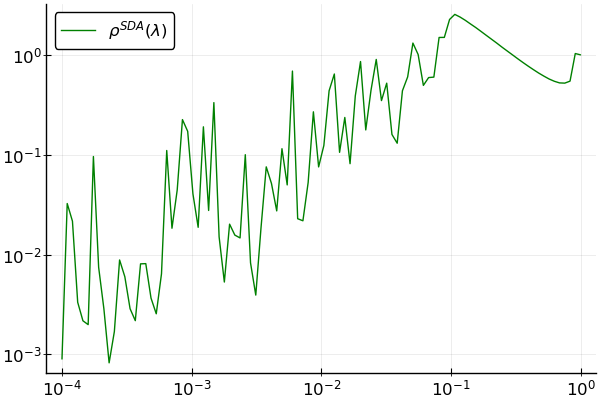

In [15]:
plot(lambda_grid, rho_est, label = L"\rho^{SDA}(\lambda)", xscale = :log10, yscale = :log10, 
color = :green)

The spectrum looks very noisy below $10^-1$. This indicates that the ensemble size is not high enough below this $\lambda$-value to produce a reproducible result. Why is the case that is harder to estimate $\rho(\lambda)$ below some treshold. Let us examine that in terms of the $X$ distribution.

For a high value of $\lambda \sim \mathcal{O}(1)$

In [29]:
lambda = 0.5
x1 = x_lambda(lambda, c, T, ens_size, epsilon);

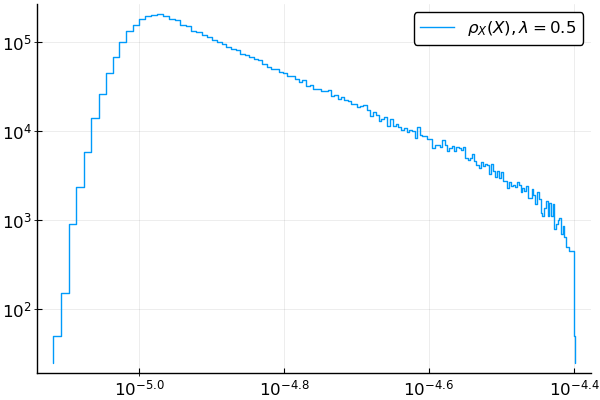

In [32]:
stephist(x1, normed = true, yscale = :log10, xscale = :log10, label = L"\rho_X(X), \lambda ="*"$lambda")

The distribution looks as a truncated power law and in consequence, the estimation of the mean is not a big problem

For $\lambda \ll 1$

In [33]:
lambda = 0.01
x2 = x_lambda(lambda, c, T, ens_size, epsilon);

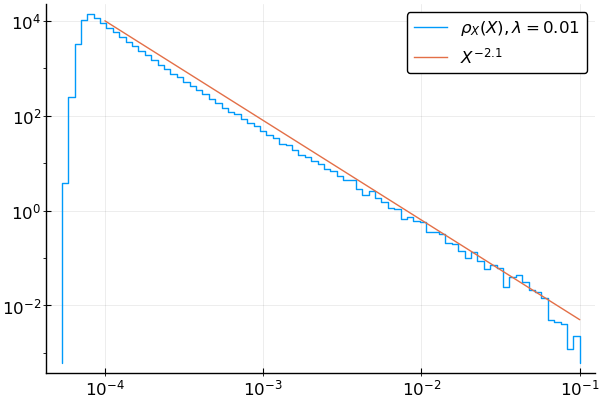

In [46]:
stephist(x2, normed = true, yscale = :log10, xscale = :log10, label = L"\rho_X(X), \lambda ="*"$lambda",
bins = exp10.(range(-5,stop = -1, length= 100)))
b = exp10.(range(-4, stop = -1, length =100))
plot!(b, (b/(10^-4)).^-2.1*1/(10^-4), label = L"X^{-2.1}")

The mean estimation of a power law distribution is a non-trivial problem considering that for this exponent, the variance is unbounded. This is the basic problem that we are facing trying to estimate the spectrum for low values of $\lambda$